# Clone CodeXGLUE Repo

In [ ]:
# !git clone https://github.com/microsoft/CodeXGLUE.git
!git clone -b GPT-NeoX-Colab https://github.com/markNZed/CodeXGLUE.git

Cloning into 'CodeXGLUE'...
remote: Enumerating objects: 3374, done.
remote: Counting objects: 100% (3373/3373), done.
remote: Compressing objects: 100% (1535/1535), done.
remote: Total 3374 (delta 1746), reused 3328 (delta 1733), pack-reused 1 (from 1)
Receiving objects: 100% (3374/3374), 213.16 MiB | 10.45 MiB/s, done.
Resolving deltas: 100% (1746/1746), done.
Updating files: 100% (400/400), done.


In [ ]:
%cd /content
!git lfs install
!git clone https://github.com/markNZed/GPT-NeoX-Colab.git
%cd /content/GPT-NeoX-Colab/data
!tar -xf py150_preprocessed.tar.gz
!mkdir -p /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion
!cp py150_preprocessed/* /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion
%cd /content

/content
Git LFS initialized.
Cloning into 'GPT-NeoX-Colab'...
remote: Enumerating objects: 496, done.
remote: Counting objects: 100% (99/99), done.
remote: Compressing objects: 100% (78/78), done.
remote: Total 496 (delta 42), reused 48 (delta 17), pack-reused 397 (from 1)
Receiving objects: 100% (496/496), 113.89 MiB | 24.20 MiB/s, done.
Resolving deltas: 100% (254/254), done.
Filtering content: 100% (2/2), 158.65 MiB | 51.44 MiB/s, done.
/content/GPT-NeoX-Colab/data
/content


# Downloading and Preprocessing Dataset

In [ ]:
import os

# Define the file path you want to check for existence
file_path = "/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion"  # Replace with the actual file name you want to check

# Check if the file exists
if not os.path.exists(file_path):
    # Change directory
    %cd /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150
    # Run the shell script to download and extract
    !bash /content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/download_and_extract.sh
    # Run the preprocessing Python script
    !python preprocess.py --base_dir=py150_files --output_dir=token_completion
else:
    print("File already exists, skipping download and preprocessing.")


File already exists, skipping download and preprocessing.


# Cloning GPT-NeoX Repo

In [ ]:
%cd /content/
!git clone https://github.com/EleutherAI/gpt-neox.git

/content
Cloning into 'gpt-neox'...
remote: Enumerating objects: 19496, done.
remote: Counting objects: 100% (1699/1699), done.
remote: Compressing objects: 100% (821/821), done.
remote: Total 19496 (delta 1254), reused 1202 (delta 870), pack-reused 17797 (from 1)
Receiving objects: 100% (19496/19496), 113.66 MiB | 36.44 MiB/s, done.
Resolving deltas: 100% (14113/14113), done.


# Install Dependencies

In [ ]:
%%time
%cd /content/gpt-neox
# Could not redirect to /dev/null in the standard Colab notebook (maybe no output for a particular time?)
# Currently deepspeed from GTP-NeoX is not compatible with logging in torch >= 2.4
!pip install torch==2.3 torchaudio==2.3.0 torchvision==0.18.0 transformers==4.41.0 sentence-transformers==2.2.2
!pip install -r ./requirements/requirements.txt

/content/gpt-neox
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 779.1/779.1 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 75.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 50.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.6 MB/s et

# Preparing Custom Dataset


In [ ]:
%cd /content/gpt-neox
!!mkdir -p data

/content/gpt-neox


[]

In [ ]:
import json

# Generate a list of dictionaries
lines = []
with open("/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion/train.txt", encoding="utf8") as f:
    for line in f.read().splitlines():
        if line:
            lines.append({"text": line})

# Convert to a list of JSON strings
json_lines = [json.dumps(l) for l in lines]

# Join lines and save to .jsonl file
json_data = '\n'.join(json_lines)
with open('/content/gpt-neox/data/py95K_train.jsonl', 'w') as f:
    f.write(json_data)

# Using Byte-Pair Encoding Tokenizer

In [ ]:
%cd data
!wget https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json
!wget https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-merges.txt

/content/gpt-neox/data
--2024-11-05 19:55:22--  https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-vocab.json
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.73.216, 52.216.166.29, 3.5.2.19, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.73.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1042301 (1018K) [application/json]
Saving to: ‘gpt2-vocab.json’

gpt2-vocab.json     100%[===================>]   1018K  2.68MB/s    in 0.4s    

2024-11-05 19:55:23 (2.68 MB/s) - ‘gpt2-vocab.json’ saved [1042301/1042301]

--2024-11-05 19:55:23--  https://s3.amazonaws.com/models.huggingface.co/bert/gpt2-merges.txt
Resolving s3.amazonaws.com (s3.amazonaws.com)... 16.182.73.216, 52.216.166.29, 3.5.2.19, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|16.182.73.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 456318 (446K) [text/plain]
Saving to: ‘gpt2-merges.txt’

gpt2-merges.txt     100%[===================>] 44

In [ ]:
%cd /content/GPT-NeoX-Colab/data
!tar -xf py150_processed.tar.gz
!mkdir -p /content/gpt-neox/processed_data
!cp py150_processed/* /content/gpt-neox/processed_data
%cd /content

/content/GPT-NeoX-Colab/data
/content


In [ ]:
%%time
import os

# Define the file path you want to check for existence
file_path = "/content/gpt-neox/processed_data"

# Check if the file exists
if not os.path.exists(file_path):
  %cd /content/gpt-neox
  !mkdir -p processed_data
  !python tools/datasets/preprocess_data.py \
    --input ./data/py95K_train.jsonl \
    --vocab ./data/gpt2-vocab.json \
    --merge-file ./data/gpt2-merges.txt \
    --output-prefix ./processed_data/py150 \
    --tokenizer-type GPT2BPETokenizer \
    --dataset-impl mmap \
    --append-eod
else:
    print("File already exists, skipping download and preprocessing.")


File already exists, skipping download and preprocessing.
CPU times: user 713 µs, sys: 3 µs, total: 716 µs
Wall time: 722 µs


# Tokens count in Dataset

In [ ]:
from transformers import GPT2Tokenizer

# Initialize the GPT-2 tokenizer (BPE-based)
tokenizer = GPT2Tokenizer.from_pretrained("gpt2")

# Path to your text file
file_path = "/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion/train.txt"

# Initialize a token counter
total_token_count = 0

# Open the file and read line by line to count tokens
with open(file_path, "r", encoding="utf-8") as file:
   for line in file:
       tokens = tokenizer.encode(line)
       total_token_count += len(tokens)

print(f"Total token count: {total_token_count}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (3814 > 1024). Running this sequence through the model will result in indexing errors


Total token count: 182707377


# Training

In [ ]:
%load_ext tensorboard

In [ ]:
%%time
%cd /content/gpt-neox
!python ./deepy.py train.py --conf_dir /content/GPT-NeoX-Colab/configs CC19M.yml cc_setup.yml

Streaming output truncated to the last 5000 lines.
[2024-11-05 20:15:51,389] [INFO] [logging.py:96:log_dist] [Rank 0] time (ms) | fwd: 100.63 | bwd: 359.00 | bwd_inner: 353.84 | bwd_allreduce: 5.07 | step: 36.18
[2024-11-05 20:15:51,920] [INFO] [logging.py:96:log_dist] [Rank 0] comm op: all_reduce | time (ms): 0.06 | msg size: 134.33 MB | algbw (Gbps): 40921.92 | busbw (Gbps): 0.00
[2024-11-05 20:15:51,928] [INFO] [logging.py:96:log_dist] [Rank 0] comm op: all_reduce | time (ms): 0.16 | msg size: 1.0 B | algbw (Gbps): 0.00 | busbw (Gbps): 0.00
[2024-11-05 20:15:51,936] [INFO] [logging.py:96:log_dist] [Rank 0] comm op: all_reduce | time (ms): 0.16 | msg size: 4.0 B | algbw (Gbps): 0.00 | busbw (Gbps): 0.00
[2024-11-05 20:15:51,939] [INFO] [logging.py:96:log_dist] [Rank 0] comm op: all_reduce | time (ms): 0.14 | msg size: 4.0 B | algbw (Gbps): 0.00 | busbw (Gbps): 0.00
[2024-11-05 20:15:51,957] [INFO] [logging.py:96:log_dist] [Rank 0] comm op: all_gather_into_tensor | time (ms): 0.07 | m

In [ ]:
!pip show datasets
!pip install datasets==1.18.0
!pip install hf-transfer
!pip install lm-eval --upgrade

# Inference

/content/gpt-neox
Available scalar keys: ['timers/forward', 'timers/backward', 'timers/backward-backward', 'timers/backward-allreduce', 'timers/optimizer', 'timers/batch generator', 'train/learning_rate', 'train/lm_loss', 'train/loss_scale', 'runtime/samples_per_sec', 'runtime/iteration_time', 'runtime/flops_per_sec_per_gpu', 'validation/lm_loss', 'validation/lm_loss_ppl', 'test/lm_loss', 'test/lm_loss_ppl']


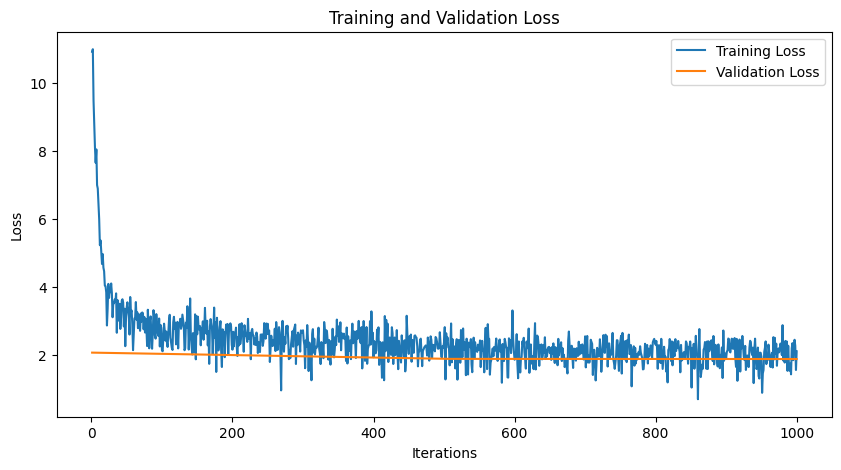

In [ ]:
%cd /content/gpt-neox

import tensorflow as tf
import matplotlib.pyplot as plt
from tensorboard.backend.event_processing import event_accumulator
import os
import numpy as np
# Path to the latest log file
log_dir = "tensorboard"
log_files = [os.path.join(log_dir, d) for d in os.listdir(log_dir)]
latest_log_dir = max(log_files, key=os.path.getmtime)

# Initialize EventAccumulator to load scalar data
ea = event_accumulator.EventAccumulator(latest_log_dir)
ea.Reload()  # Load all logs

# List all scalar keys available in the logs
scalar_keys = ea.Tags()['scalars']
print("Available scalar keys:", scalar_keys)

# Extract training and validation losses
train_loss = ea.Scalars('train/lm_loss')  # Adjust for actual name if necessary
val_loss = ea.Scalars('validation/lm_loss')  # Adjust for actual name if necessary

# Convert to lists for plotting
train_loss_values = [x.value for x in train_loss]
val_loss_values = [x.value for x in val_loss]

# Find the lengths of both arrays
len_train = len(train_loss_values)
len_val = len(val_loss_values)

iterations = None
# Interpolate the shorter array
if len_train != len_val:
    if len_train > len_val:
        # Interpolate validation loss to match the training loss length
        iterations = np.linspace(1, len_train, len_train)
        val_iterations = np.linspace(1, len_train, len_val)
        val_loss_values = np.interp(iterations, val_iterations, val_loss_values)
    else:
        # Interpolate training loss to match the validation loss length
        iterations = np.linspace(1, len_val, len_val)
        train_iterations = np.linspace(1, len_val, len_train)
        train_loss_values = np.interp(iterations, train_iterations, train_loss_values)
else:
    iterations = range(1, len_train + 1)

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(iterations, train_loss_values, label='Training Loss')
plt.plot(iterations, val_loss_values, label='Validation Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


# HuggingFace Inference

# Convert Our Model to HuggingFace Format

In [ ]:
import os

# Define the path to the checkpoints directory
checkpoints_dir = "/content/gpt-neox/checkpoints"

# Read the 'latest' file to get the latest checkpoint name
with open(os.path.join(checkpoints_dir, "latest"), "r") as f:
    latest_checkpoint_name = f.read().strip()

# Construct the full path to the latest checkpoint directory
latest_checkpoint_path = os.path.join(checkpoints_dir, latest_checkpoint_name)
print("Path to the latest checkpoint:", latest_checkpoint_path)

Path to the latest checkpoint: /content/gpt-neox/checkpoints/global_step1000


In [ ]:
!python ./tools/ckpts/convert_neox_to_hf.py --input_dir {latest_checkpoint_path} --config_file /content/GPT-NeoX-Colab/configs/CC19M.yml --output_dir hf_model/save/location --precision auto --architecture neox

[2024-11-05 20:23:44,083] [INFO] [real_accelerator.py:161:get_accelerator] Setting ds_accelerator to cuda (auto detect)
Detected 'pipe-parallel-size' of 0, assuming model is saved as Sequential...
> building GPT2BPETokenizer tokenizer ...
 > padded vocab (size: 50257) with 47 dummy tokens (new size: 50304)
Auto-detecting precision to save model into...
Saving weights in fp16 precision...
['sequential.0.word_embeddings.weight', 'sequential.2.input_layernorm.weight', 'sequential.2.input_layernorm.bias', 'sequential.2.attention.query_key_value.weight', 'sequential.2.attention.query_key_value.bias', 'sequential.2.attention.dense.weight', 'sequential.2.attention.dense.bias', 'sequential.2.post_attention_layernorm.weight', 'sequential.2.post_attention_layernorm.bias', 'sequential.2.mlp.linear1.weight', 'sequential.2.mlp.linear1.bias', 'sequential.2.mlp.linear2.weight', 'sequential.2.mlp.linear2.bias', 'sequential.3.input_layernorm.weight', 'sequential.3.input_layernorm.bias', 'sequential.3.a

# Code Completion

In [55]:
from transformers import GPTNeoXForCausalLM
import torch

# Move to model directory
%cd /content/gpt-neox

# Assuming CharLevelTokenizer is properly imported and instantiated
from megatron.tokenizer.tokenizer import _GPT2BPETokenizer
tokenizer = _GPT2BPETokenizer(vocab_file="data/gpt2-vocab.json", merge_file="data/gpt2-merges.txt")

# Load your model
model_path = "/content/gpt-neox/hf_model/save/location"
model = GPTNeoXForCausalLM.from_pretrained(model_path)

# Define a simple char-level tokenizer if not provided
def token_level_tokenize(text):
    return tokenizer.tokenize(text)

def token_level_detokenize(tokens):
    return tokenizer.detokenize(tokens)

# Set the model to evaluation mode
model.eval()

# Prompt the user for input
input_text = """<s> import sys , os <EOL> import imp <EOL> from optparse import make_option <EOL> from django . conf import settings <EOL> from django . utils . importlib import import_module <EOL> from django . core . management import call_command <EOL> from django . core . management import BaseCommand <EOL> from django . db import connections <EOL> def import_app ( app_label , verbosity ) : <EOL> try : <EOL> app_path = __import__ ( app_label , { } , { } , [ app_label . split ( '<STR_LIT:.>' ) [ - <NUM_LIT:1> ] ] ) . __path__ <EOL>"""

# Tokenize and prepare input
input_ids = torch.tensor([token_level_tokenize(input_text)], dtype=torch.long)
attention_mask = torch.ones_like(input_ids)  # Create an attention mask for non-padded input

# Generate text with specified pad_token_id and attention_mask
with torch.no_grad():
    output = model.generate(
        input_ids,
        attention_mask=attention_mask,
        max_length=200,          # Adjust this for desired output length
        temperature=0.7,        # Controls creativity
        top_k=50,               # Controls diversity
        top_p=0.9,              # Nucleus sampling
        num_return_sequences=1, # Number of sequences to return
        pad_token_id=model.config.eos_token_id,  # Set pad_token_id explicitly
        do_sample=True           # Enable sampling mode to use temperature and top_p
    )

# Decode the generated text
generated_text = token_level_detokenize(output[0].tolist())

# Function to replace special tokens with original representations
def replace_special_tokens(text):
    replacements = {
        "<EOL>": "\n",
        "<s>": "",
        "</s>": "",
        "<STR_LIT>": "STR_LITERAL",  # Example replacement, adjust as necessary
        "<NUM_LIT>": "NUM_LITERAL",   # Example replacement, adjust as necessary
    }

    for token, replacement in replacements.items():
        text = text.replace(token, replacement)

    return text.strip()  # Strip leading/trailing whitespace

# Replace special tokens in the generated text
final_text = replace_special_tokens(generated_text)

# Print the final output
print("Generated text:", final_text)


/content/gpt-neox
Generated text: import sys, os 
 import imp 
 from optparse import make_option 
 from django. conf import settings 
 from django. utils. importlib import import_module 
 from django. core. management import call_command 
 from django. core. management import BaseCommand 
 from django. db import connections 
 def import_app ( app_label, verbosity ) : 
 try : 
 app_path = __import__ ( app_label, { }, { }, [ app_label. split ( '<STR_LIT:.>' ) [ - <NUM_LIT:1> ] ] ). __path__ 
 def __init__ ( self, value, name ) : 
 self. __init__ = self.


# Benchmark


In [53]:
%cd /content/gpt-neox

import torch
from transformers import GPTNeoXForCausalLM

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
torch.cuda.set_device(0)

# Load the model and tokenizer
from megatron.tokenizer.tokenizer import _GPT2BPETokenizer
tokenizer = _GPT2BPETokenizer(vocab_file="data/gpt2-vocab.json", merge_file="data/gpt2-merges.txt")

model_path = "/content/gpt-neox/hf_model/save/location"
model = GPTNeoXForCausalLM.from_pretrained(model_path)

# Define a simple char-level tokenizer if not provided
def token_level_tokenize(text):
    return tokenizer.tokenize(text)

def token_level_detokenize(tokens):
    return tokenizer.detokenize(tokens)

# Read the input file with 5000 code snippets
with open("/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion/dev.txt", "r", encoding="utf-8") as f:
    documents = f.read().splitlines()

# Initialize predictions.txt as an empty file
with open("prediction.txt", "w", encoding="utf-8") as output_file:
    pass  # Just ensures the file is cleared if it exists

# Open the output file for appending
with open("prediction.txt", "a", encoding="utf-8") as output_file:
    # Process each document one by one
    for document in documents:
        # Skip empty lines
        if not document.strip():
            continue

        # Tokenize the input and ensure it doesn't exceed 200 tokens
        input_ids = token_level_tokenize(document)
        if len(input_ids) > 200:
            input_ids = input_ids[:200]

        # Prepare tensor and attention mask
        input_tensor = torch.tensor([input_ids], dtype=torch.long).to(device)
        attention_mask = torch.ones_like(input_tensor)

        # Set the model to evaluation mode
        model.eval()
        model.to(device)

        # Generate text with specified pad_token_id and attention_mask
        with torch.no_grad():
            output = model.generate(
                input_tensor,
                attention_mask=attention_mask,
                max_length=len(input_ids) + 50,  # max_length slightly greater than input to allow for generation
                temperature=0.7,
                top_k=50,
                top_p=0.9,
                num_return_sequences=1,
                pad_token_id=model.config.eos_token_id,
                do_sample=True
            )

        # Decode and format the generated output
        generated_text = token_level_detokenize(output[0].tolist())

        # Store input text and generated output in the output file
        output_file.write(f"{generated_text}\n")

print("Processing complete. Predictions stored in 'predictions.txt'.")

/content/gpt-neox
Processing complete. Predictions stored in 'predictions.txt'.


In [46]:
import locale
print(locale.getpreferredencoding())

UTF-8


In [45]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [54]:
%cd /content/CodeXGLUE/Code-Code/CodeCompletion-token
!ls
!python evaluator/evaluator.py -a=/content/CodeXGLUE/Code-Code/CodeCompletion-token/dataset/py150/token_completion/dev.txt -p=/content/gpt-neox/prediction.txt


/content/CodeXGLUE/Code-Code/CodeCompletion-token
code  completion_python_eval.log  dataset  evaluator  README.md
Traceback (most recent call last):
  File "/content/CodeXGLUE/Code-Code/CodeCompletion-token/evaluator/evaluator.py", line 36, in <module>
    main()
  File "/content/CodeXGLUE/Code-Code/CodeCompletion-token/evaluator/evaluator.py", line 26, in main
    assert len(pred) == len(gt), f"Sequence length of prediction and answer are not equal, {len(pred)}: {len(gt)}"
AssertionError: Sequence length of prediction and answer are not equal, 115: 168
